This script uses the Nunez features added data table and the Mazvidal features added as a simulation for how similar Nunez's training set creates a model that compares her testing set and Mazvidal's testing set using that model. 
The added features are for X1 and X2, where X1 is the champ and X2 is the challenger in these sets. When Mazvidal's testing set is used to test similarity in Nunez's fighter action/reactions to Mazvidal's this tests how the X1 hits landed for Nunez predict the X1 hits landed of Mazvidal's fighter action/reactions against his challenger Till in that set. The Nunez set uses the first round of Tate, Rousey, and Pennington up to 5 minutes each. 
These added features split the hits landed, missed, and received into cross, jab, knee, kick, elbow, upper cut, takedown, hooks, and hammer hits for each of landed (ends in 'l', i.e. 'crossl.X1' for X1 or 'crossl.X2' for X2) and ends in 'm' for missed, and ends in 'r' for 'received' or 'got hit'. There are 182 total features, where the features for targeting the hits landed by X1 use all the features except for those features that are the types of hits landed for X1, the hits received by X2 that are identical to hits landed by X1 (the target), and for consistent machine learning the ordinal/factor variables for time, notes, and action/reactions of each fighter were omitted.

In [307]:
%%time

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

# Read in the file 
df = pd.read_csv('SarahWolfEaten_addedFeatures.csv')



Wall time: 78 ms


In [308]:
df.head()

,Round,SecondsIntoRound,lastAction,SecondsLastRoundAction,cmTotHitsR.X1,cmTotHitsL.X1,cmTotHitsM.X1,TotLandsX1,TotMissedX1,TotReceivedX1,...,hammer2r.X2,Cross3r.X2,Knee3r.X2,Elbow3r.X2,Hook3r.X2,Jab3r.X2,Kick3r.X2,upper3r.X2,takedown3r.X2,hammer3r.X2
0,1,9,0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,13,9,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,16,13,3,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,18,16,2,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,37,18,19,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [309]:
df.describe()

,Round,SecondsIntoRound,lastAction,SecondsLastRoundAction,cmTotHitsR.X1,cmTotHitsL.X1,cmTotHitsM.X1,TotLandsX1,TotMissedX1,TotReceivedX1,...,hammer2r.X2,Cross3r.X2,Knee3r.X2,Elbow3r.X2,Hook3r.X2,Jab3r.X2,Kick3r.X2,upper3r.X2,takedown3r.X2,hammer3r.X2
count,162.0,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,...,162.0,162.0,162.0,162.0,162.0,162.0,162.0,162.0,162.0,162.0
mean,1.0,122.395062,122.111111,3.320988,0.987654,4.388889,23.148148,0.216049,0.685185,0.030864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,81.533772,81.880841,3.604094,1.074768,3.770184,15.756778,0.469163,0.654390,0.173486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,45.250000,45.000000,1.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,119.000000,119.000000,2.000000,1.000000,3.000000,22.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,173.750000,173.750000,4.000000,2.000000,7.000000,31.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,299.000000,299.000000,22.000000,3.000000,14.000000,58.000000,2.000000,3.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [310]:
colNames = pd.DataFrame(df.columns)
print colNames[0:21]
print colNames[21:50]


                              0
0                         Round
1              SecondsIntoRound
2                    lastAction
3        SecondsLastRoundAction
4                 cmTotHitsR.X1
5                 cmTotHitsL.X1
6                 cmTotHitsM.X1
7                    TotLandsX1
8                   TotMissedX1
9                 TotReceivedX1
10                cmTotHitsR.X2
11                cmTotHitsL.X2
12                cmTotHitsM.X2
13                   TotLandsX2
14                  TotMissedX2
15                TotReceivedX2
16                         Time
17    FighterActionReactions.X1
18  FightersActionsReactions.X2
19                        Notes
20                    Crossl.X1
                0
21       Kneel.X1
22      Elbowl.X1
23       Hookl.X1
24        Jabl.X1
25       Kickl.X1
26      upperl.X1
27   takedownl.X1
28     hammerl.X1
29     Cross2l.X1
30      Knee2l.X1
31     Elbow2l.X1
32      Hook2l.X1
33       Jab2l.X1
34      Kick2l.X1
35     upper2l.X1
36  take

In [311]:
print colNames[50:75]
print colNames[75:105]


                0
50       Hookl.X2
51        Jabl.X2
52       Kickl.X2
53      upperl.X2
54   takedownl.X2
55     hammerl.X2
56     Cross2l.X2
57      Knee2l.X2
58     Elbow2l.X2
59      Hook2l.X2
60       Jab2l.X2
61      Kick2l.X2
62     upper2l.X2
63  takedown2l.X2
64    hammer2l.X2
65     Cross3l.X2
66      Knee3l.X2
67     Elbow3l.X2
68      Hook3l.X2
69       Jab3l.X2
70      Kick3l.X2
71     upper3l.X2
72  takedown3l.X2
73    hammer3l.X2
74      Crossm.X1
                 0
75        Kneem.X1
76       Elbowm.X1
77        Hookm.X1
78         Jabm.X1
79        Kickm.X1
80       upperm.X1
81    takedownm.X1
82      hammerm.X1
83      Cross2m.X1
84       Knee2m.X1
85      Elbow2m.X1
86       Hook2m.X1
87        Jab2m.X1
88       Kick2m.X1
89      upper2m.X1
90   takedown2m.X1
91     hammer2m.X1
92      Cross3m.X1
93       Knee3m.X1
94      Elbow3m.X1
95       Hook3m.X1
96        Jab3m.X1
97       Kick3m.X1
98      upper3m.X1
99   takedown3m.X1
100    hammer3m.X1
101      Crossm.X2


In [312]:
print colNames[104:130]
print colNames[130:160]
print colNames[160:]

                 0
104       Hookm.X2
105        Jabm.X2
106       Kickm.X2
107      upperm.X2
108   takedownm.X2
109     hammerm.X2
110     Cross2m.X2
111      Knee2m.X2
112     Elbow2m.X2
113      Hook2m.X2
114       Jab2m.X2
115      Kick2m.X2
116     upper2m.X2
117  takedown2m.X2
118    hammer2m.X2
119     Cross3m.X2
120      Knee3m.X2
121     Elbow3m.X2
122      Hook3m.X2
123       Jab3m.X2
124      Kick3m.X2
125     upper3m.X2
126  takedown3m.X2
127    hammer3m.X2
128      Crossr.X1
129       Kneer.X1
                 0
130      Elbowr.X1
131       Hookr.X1
132        Jabr.X1
133       Kickr.X1
134      upperr.X1
135   takedownr.X1
136     hammerr.X1
137     Cross2r.X1
138      Knee2r.X1
139     Elbow2r.X1
140      Hook2r.X1
141       Jab2r.X1
142      Kick2r.X1
143     upper2r.X1
144  takedown2r.X1
145    hammer2r.X1
146     Cross3r.X1
147      Knee3r.X1
148     Elbow3r.X1
149      Hook3r.X1
150       Jab3r.X1
151      Kick3r.X1
152     upper3r.X1
153  takedown3r.X1
154    hamme

## Split the data into 70% Training and 30% Testing Samples

In [313]:
# remove/exclude target variable and time, notes, hits X2 received 15:19 and all types of hits landed by X1 
# in (20:46), and hits received by X2(155:181): 
X = df.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,
               13,14,47,48,49,50,51,52,53,54,
               55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,
               71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,
               88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,
               104,105,106,107,108,109,110,111,112,113,114,115,116,
               117,118,119,120,121,122,123,124,125,126,127,128,129,
               130,131,132,133,134,135,136,137,138,139,140,141,142,
               143,144,145,146,147,148,149,150,151,152,153,154,155]].values # returns array of all instances other than the target
y = df.iloc[:, 7] .values # returns array of all instances of the target 'TotLandsX1'

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(113L, 123L)
(49L, 123L)
(113L,)
(49L,)


In [314]:
dfn = df.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,
               13,14,47,48,49,50,51,52,53,54,
               55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,
               71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,
               88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,
               104,105,106,107,108,109,110,111,112,113,114,115,116,
               117,118,119,120,121,122,123,124,125,126,127,128,129,
               130,131,132,133,134,135,136,137,138,139,140,141,142,
               143,144,145,146,147,148,149,150,151,152,153,154,155]]
print dfn.columns

Index([u'Round', u'SecondsIntoRound', u'lastAction', u'SecondsLastRoundAction',
       u'cmTotHitsR.X1', u'cmTotHitsL.X1', u'cmTotHitsM.X1', u'TotMissedX1',
       u'TotReceivedX1', u'cmTotHitsR.X2',
       ...
       u'Cross3r.X1', u'Knee3r.X1', u'Elbow3r.X1', u'Hook3r.X1', u'Jab3r.X1',
       u'Kick3r.X1', u'upper3r.X1', u'takedown3r.X1', u'hammer3r.X1',
       u'Crossr.X2'],
      dtype='object', length=123)


In [315]:
stdscaler = preprocessing.StandardScaler().fit(X_train)
X_scaled  = stdscaler.transform(X)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

In [316]:
print "Training set samples: ", len(X_train)
print "Testing set samples: ", len(X_test)
n = len(X_test)
print n

Training set samples:  113
Testing set samples:  49
49


In [317]:
df2 = pd.read_csv('wolfey_addedFeatures.csv')

In [318]:
df2.describe() #the simulated features to test the target hits landed of Nines using Maz's actual hits landed

,Round,SecondsIntoRound,lastAction,SecondsLastRoundAction,cmTotHitsR.X1,cmTotHitsL.X1,cmTotHitsM.X1,TotLandsX1,TotMissedX1,TotReceivedX1,...,hammer2r.X2,Cross3r.X2,Knee3r.X2,Elbow3r.X2,Hook3r.X2,Jab3r.X2,Kick3r.X2,upper3r.X2,takedown3r.X2,hammer3r.X2
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,...,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0
mean,1.369565,121.793478,119.728261,39.119565,1.782609,4.076087,7.293478,0.152174,0.315217,0.086957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.485332,79.356414,80.031327,57.544410,1.184386,2.335741,5.685026,0.417601,0.533068,0.319759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,49.750000,48.750000,3.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.000000,121.000000,116.000000,8.000000,2.000000,4.000000,6.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2.000000,174.500000,172.250000,48.250000,2.000000,6.000000,10.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2.000000,298.000000,298.000000,190.000000,4.000000,8.000000,19.000000,2.000000,2.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [319]:
#this following vector of random samples taken from a random vector created in R software sample(x,n,replace=F)
maz = df2.ix[[36 ,62, 25, 27,  5 ,45 ,19 ,37, 90, 48, 47, 61 ,59, 82 ,88, 83 ,43 ,78 ,32, 17 ,11, 24 , 2 ,49
,40 ,53 ,50,  6 ,51, 85 ,30, 23, 39, 80 ,22, 67, 46 ,21, 38, 58 ,16 ,35, 15, 72 ,55 ,68 , 3 ,65
,63],:]

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [320]:
maz.describe()

,Round,SecondsIntoRound,lastAction,SecondsLastRoundAction,cmTotHitsR.X1,cmTotHitsL.X1,cmTotHitsM.X1,TotLandsX1,TotMissedX1,TotReceivedX1,...,hammer2r.X2,Cross3r.X2,Knee3r.X2,Elbow3r.X2,Hook3r.X2,Jab3r.X2,Kick3r.X2,upper3r.X2,takedown3r.X2,hammer3r.X2
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,...,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0
mean,1.326531,126.673469,127.265306,32.081633,1.714286,4.387755,7.612245,0.204082,0.265306,0.081633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.473804,80.746359,82.495398,53.648096,1.136515,2.334669,5.957545,0.455503,0.569192,0.343798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,10.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,49.000000,63.000000,3.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.000000,129.000000,125.000000,7.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2.000000,180.000000,179.000000,26.000000,2.000000,6.000000,12.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2.000000,287.000000,298.000000,185.000000,4.000000,8.000000,17.000000,2.000000,2.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [321]:
maz.shape

(49, 182)

In [322]:
y_test1 = maz.iloc[:,7].values
y_test1.shape

(49L,)

In [323]:
X_train_std = X_train_scaled #Nunez training samples to build model
X_test_std = X_test_scaled #Nunez testing set

In [324]:
X_testN = X_test #Nunez, use this later
X_testN

array([[  1, 195, 193, ...,   0,   0,   0],
       [  1, 138, 135, ...,   0,   0,   0],
       [  1,  80,  77, ...,   0,   0,   0],
       ...,
       [  1,  13,   9, ...,   0,   0,   0],
       [  1,  45,  44, ...,   0,   0,   0],
       [  1,  37,  34, ...,   0,   0,   0]], dtype=int64)

In [325]:
X_test = maz.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,
               13,14,47,48,49,50,51,52,53,54,
               55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,
               71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,
               88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,
               104,105,106,107,108,109,110,111,112,113,114,115,116,
               117,118,119,120,121,122,123,124,125,126,127,128,129,
               130,131,132,133,134,135,136,137,138,139,140,141,142,
               143,144,145,146,147,148,149,150,151,152,153,154,155]].values 
X_testM = X_test
print X_testM
X_test_scaled  = stdscaler.transform(X_test) #normalize the maz simulated instances for testing Nunez's hits landed


[[  1 157 153 ...   0   0   0]
 [  2  21  20 ...   0   0   0]
 [  1 120 110 ...   0   0   0]
 ...
 [  1  13  12 ...   0   0   0]
 [  2  40  38 ...   0   0   0]
 [  2  26  21 ...   0   0   0]]


In [326]:
X_test_scaled.shape #Maz testing set

(49L, 123L)

In [327]:
maz.columns

Index([u'Round', u'SecondsIntoRound', u'lastAction', u'SecondsLastRoundAction',
       u'cmTotHitsR.X1', u'cmTotHitsL.X1', u'cmTotHitsM.X1', u'TotLandsX1',
       u'TotMissedX1', u'TotReceivedX1',
       ...
       u'hammer2r.X2', u'Cross3r.X2', u'Knee3r.X2', u'Elbow3r.X2',
       u'Hook3r.X2', u'Jab3r.X2', u'Kick3r.X2', u'upper3r.X2',
       u'takedown3r.X2', u'hammer3r.X2'],
      dtype='object', length=182)

In [328]:
print y_test #Nunez's hits landed in her testing set of instances
print y_test1 #Maz's hits landed in his testing set of instances

[0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 2 0 0 0
 0 2 0 0 0 0 0 1 0 0 1 0]
[0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0]


### KNN

In [329]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
% time
knn = KNeighborsClassifier()
knn.fit(X_train_std,
        y_train) #train Nunez's model on a sample of her instances

Wall time: 0 ns


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [330]:
% time
y_pred = knn.predict(X_test_std)#Nunez test samples
y_pred2 = knn.predict(X_test_scaled)#Maz test samples

Wall time: 0 ns


In [333]:
% time
y_predN = knn.predict(X_testN)#Nunez test samples
y_predM = knn.predict(X_testM)#Maz test samples

Wall time: 0 ns


In [335]:
#if the test samples aren't scaled, the results for KNN predictions are worse as this shows
print y_predN
print y_predM

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [336]:
print y_pred.shape
print y_pred2.shape
print y_test.shape #these are Nunez's true test sample hits landed
print y_test1.shape #these are Maz's true test sample hits landed

(49L,)
(49L,)
(49L,)
(49L,)


In [363]:
y_pred
y_pred2


print 'Nunez true hits landed:\n',y_test
print 'The actual hits landed in Nunez testing set is: ', sum(y_test), 'out of ',len(y_test),'samples.\n'

print '\n\n', 'Mazvidal true hits landed:\n',y_test1
print 'and the actual hits landed in the Mazvidal testing set is: ', sum(y_test1), 'out of ',len(y_test1),'samples.\n'

s = float(sum(y_test1))
l = float(len(y_test1))
S = float(sum(y_test))
L = float(len(y_test))

print '\n\nThe accuracies are based on correctly predicting if the instance predicts a hit landed (1) or a hit not landed (0)'
print 'If you guess 0 for every one of the instances,'
print 'then the accuracy for Mazvidal is: ', round(((l-s)/(l)),2)*100,'%.'
print 'And the accuracy for Nunez is: ', round(((L-S)/(L)),2)*100,'%.\n'

print 'Nunez predicted with Nunez Training',y_pred,'\n\n' , 'Maz predicted with Nunez training',y_pred2, '\n'

print 'The instances that the Maz test predictions equaled the Mazvidal true hits landed '
print 'but also shows how similar Nunez actions or reactions are to Mazvidal: ', sum(y_pred2==y_test1)
print 'Accuracy: ',accuracy_score(y_pred2, y_test1),'\n'

print 'The instances that the Nunez test predictions equaled the Nunez true hits landed: '
print 'This shows how well the model trained will predict on the samples derived from the same set', sum(y_pred==y_test)
print 'Accuracy: ',accuracy_score(y_pred, y_test),'\n'

print '\nThe instances that the Nunez test predictions equaled the Maz test predictions set: ', sum(y_pred==y_pred2)
print 'Accuracy: ',accuracy_score(y_pred, y_pred2),'\n'

print 'The instances that the Nunez test predictions equaled the Maz true hits landed: ', sum(y_pred==y_test)
print 'Accuracy: ',accuracy_score(y_pred, y_test),'\n'



Nunez true hits landed:
[0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 2 0 0 0
 0 2 0 0 0 0 0 1 0 0 1 0]
The actual hits landed in Nunez testing set is:  12 out of  49 samples.



Mazvidal true hits landed:
[0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0]
and the actual hits landed in the Mazvidal testing set is:  10 out of  49 samples.



The accuracies are based on correctly predicting if the instance predicts a hit landed (1) or a hit not landed (0)
If you guess 0 for every one of the instances,
then the accuracy for Mazvidal is:  80.0 %.
And the accuracy for Nunez is:  76.0 %.

Nunez predicted with Nunez Training [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0] 

Maz predicted with Nunez training [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1
 1 1 0 0 1 0 0 0 0 0 0 0] 

The instances that the Maz test predictions equaled the Mazvida

In [364]:
from pandas import Series, DataFrame
d = pd.Series(y_pred)
m = pd.Series(y_pred2)
t = pd.Series(y_test)
z = pd.Series(y_test1)

df3 = pd.concat([d,m,t,z], axis=1)
df3.columns = ['NunezPredicted', 'MazPredicted', 'NunezRealHits','MazRealHits']

ad = pd.Series(round(accuracy_score(y_pred, y_test),2))
am = pd.Series(round(accuracy_score(y_pred, y_pred2),2))
at = pd.Series(round(accuracy_score(y_test, y_test),2))
az = pd.Series(round(accuracy_score(y_test1,y_test1),2))

df4 = pd.concat([ad,am,at,az],axis=1)#creates a vector of 1X4 for KNN results concatenating along columns
df4.columns = ['NunezPredicted', 'MazPredicted', 'NunezRealHits','MazRealHits']
df4.index = ['KNN results%']#gives the row name of this 1X4 data frame

df5 = pd.concat([df3,df4], axis=0)#concatenates along the rows for the results and scores



In [365]:
df5.columns

Index([u'NunezPredicted', u'MazPredicted', u'NunezRealHits', u'MazRealHits'], dtype='object')

In [366]:
# This table shows how many of the actualy hits landed in the testing set for Maz were predicted and their index number
MazHits = df3.loc[(df3.MazRealHits >0), ['MazPredicted','MazRealHits']]#Maz's set wasn't trained, this is how similar Nunez is to Maz
# according to KNN algorithm
print MazHits

    MazPredicted  MazRealHits
1              0            1
9              0            1
12             0            1
14             0            1
15             0            1
20             0            2
31             1            1
36             1            1
40             0            1


In [367]:
MazHitsRows = MazHits.index.values
print MazHitsRows
print maz.index.values


[ 1  9 12 14 15 20 31 36 40]
[36 62 25 27  5 45 19 37 90 48 47 61 59 82 88 83 43 78 32 17 11 24  2 49
 40 53 50  6 51 85 30 23 39 80 22 67 46 21 38 58 16 35 15 72 55 68  3 65
 63]


In [368]:
mazHits = maz.iloc[[1,9,12,14,15,20,31,36,40],0:183]#extracts the same rows, but has different labels from original Maz df
MazTotalKNN = pd.concat([MazHits,mazHits], axis=1)#concatenates the testing hits of Maz with all other fields, different row names
print MazHits.index.values
print mazHits.index.values

Maz_new = mazHits.rename(index={62:1,48:9,59:12,88:14,83:15,11:20,23:31,46:36,16:40})
print Maz_new.index.values

[ 1  9 12 14 15 20 31 36 40]
[62 48 59 88 83 11 23 46 16]
[ 1  9 12 14 15 20 31 36 40]


In [369]:
Maz_new.iloc[:,7]

1     1
9     1
12    1
14    1
15    1
20    2
31    1
36    1
40    1
Name: TotLandsX1, dtype: int64

In [370]:
MazTotalKNN = pd.concat([MazHits, Maz_new], axis=1)#concatenates 
predicted = MazTotalKNN.iloc[:,0]
actual = MazTotalKNN.iloc[:,1]
print 'Predicted Hits landed: ', float(sum(predicted))
print 'Actual Hits landed: ',float(sum(actual))
print 'Accuracy in Predicting Hits Landed of True Hits landed: ', round((float(sum(predicted))/float(sum(actual)))*100,2),'%\n'
print MazTotalKNN

MazTotalKNN.to_csv('MazTestSetUsingNunez_KNN_results.csv')

Predicted Hits landed:  2.0
Actual Hits landed:  10.0
Accuracy in Predicting Hits Landed of True Hits landed:  20.0 %

    MazPredicted  MazRealHits  Round  SecondsIntoRound  lastAction  \
1              0            1      2                21          20   
9              0            1      1               245         238   
12             0            1      2                16          10   
14             0            1      2               182         179   
15             0            1      2               154         151   
20             0            2      1                49          48   
31             1            1      1                95          94   
36             1            1      1               235         234   
40             0            1      1                67          66   

    SecondsLastRoundAction  cmTotHitsR.X1  cmTotHitsL.X1  cmTotHitsM.X1  \
1                       21              0              2              0   
9                        7    

In [371]:
# this shows how many hits landed were in the Nunez testing set and the predicted values for corresponding index values
NunezHits = df3.loc[(df3.NunezRealHits >0), ['NunezPredicted','NunezRealHits']]
print NunezHits #testing set of Nunez hits landed

#dfn is the columns used in the Nunez testing and training sets
# X_test_std is the Nunez testing set as an array that is scaled, keep the original non-scaled 'X_test'

colnames = dfn.columns #creates a vector of names from the Nunez testing and training set columns used/selected

print '\nThese are the columns selected to train:\n',colnames,'\n'

X_Nunez = pd.DataFrame(X_test)# don't use the scaled version, it has negative values

print 'Nunez Testing set row names: \n', X_Nunez.index.values,'\n'
print 'The Nunez test set rows having a hit landed: ', NunezHits.index.values,'\n'

X_Nunez.columns = colnames #add colunmn names to the array turned data frame that has numeric field names
X_Nunez1 = X_Nunez.iloc[[4,10,13,22,27,28,33,38,44,47],:]#select only those rows that had hits land for Nunez test samples

print '\nThis is the table of the testing set for Nunez with instances where a hit was landed: \n\n', X_Nunez1,'\n'
print y_test # zero indexed 0:48 for 49 samples, these are 1:1 values for this testing set sample of Nunez





    NunezPredicted  NunezRealHits
4                1              1
10               0              1
13               0              1
22               0              1
27               0              1
28               0              1
33               0              2
38               0              2
44               0              1
47               0              1

These are the columns selected to train:
Index([u'Round', u'SecondsIntoRound', u'lastAction', u'SecondsLastRoundAction',
       u'cmTotHitsR.X1', u'cmTotHitsL.X1', u'cmTotHitsM.X1', u'TotMissedX1',
       u'TotReceivedX1', u'cmTotHitsR.X2',
       ...
       u'Cross3r.X1', u'Knee3r.X1', u'Elbow3r.X1', u'Hook3r.X1', u'Jab3r.X1',
       u'Kick3r.X1', u'upper3r.X1', u'takedown3r.X1', u'hammer3r.X1',
       u'Crossr.X2'],
      dtype='object', length=123) 

Nunez Testing set row names: 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 

In [372]:
NunezTest = pd.concat([NunezHits,X_Nunez1], axis=1)

predicted = NunezTest.iloc[:,0]
actual = NunezTest.iloc[:,1]
p = float(sum(predicted))
a = float(sum(actual))

print 'KNN Accuracy is the predicted, ',p,' divided by the actual, ',a,' hits: ', round((p/a),2)*100,'%\n'

print NunezTest

KNN Accuracy is the predicted,  1.0  divided by the actual,  12.0  hits:  8.0 %

    NunezPredicted  NunezRealHits  Round  SecondsIntoRound  lastAction  \
4                1              1      1                37          20   
10               0              1      1               238         235   
13               0              1      2               151         138   
22               0              1      1                12           4   
27               0              1      1                41          37   
28               0              1      1               255         251   
33               0              2      2               130         125   
38               0              2      1               172         169   
44               0              1      1               287         284   
47               0              1      2                40          38   

    SecondsLastRoundAction  cmTotHitsR.X1  cmTotHitsL.X1  cmTotHitsM.X1  \
4                       17   

In [373]:
NunezTest.to_csv('NunezTest_KNN_results_python.csv')

In [379]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_pred,y_test)
cm2 = confusion_matrix(y_pred2, y_test)
cm3 = confusion_matrix(y_pred, y_pred2)
print cm
print 'Accuracy Nunez hits landed as predicted with Nunez training data (how well model predicts): ',round(accuracy_score(y_pred,y_test),2)*100,'%.\n'
print cm2
print 'Accuracy Mazvidal true hits landed as predicted with Nunez training data (how similar Nunez is to Mazvidal): ',round(accuracy_score(y_pred2, y_test1),2)*100,'%.\n'
print cm3
print 'Accuracy Nunez predicted hits compared to Mazvidal predicted hits: ', round(accuracy_score(y_pred, y_pred2),2)*100, '%.\n'

[[39  7  2]
 [ 0  1  0]
 [ 0  0  0]]
Accuracy Nunez hits landed as predicted with Nunez training data (how well model predicts):  82.0 %.

[[29  8  1]
 [10  0  1]
 [ 0  0  0]]
Accuracy Mazvidal true hits landed as predicted with Nunez training data (how similar Nunez is to Mazvidal):  67.0 %.

[[37 11]
 [ 1  0]]
Accuracy Nunez predicted hits compared to Mazvidal predicted hits:  76.0 %.



### Decision Trees


In [380]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, tree
from sklearn.metrics import classification_report, confusion_matrix



In [393]:
% time
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)#gets worse with more trees
dtc.fit(X_train_std, y_train)#Nunez training set
predicted = dtc.predict(X_test_std)#Nunez testing set

print "Decision Tree Results Nunez's Testing Set\nConfusion Matrix: "
print confusion_matrix(y_test,predicted)
print "\n Classifcation Report for Nunez's Testing Set"
print classification_report(y_test,predicted)

Wall time: 0 ns
Decision Tree Results Nunez's Testing Set
Confusion Matrix: 
[[39  0  0]
 [ 7  1  0]
 [ 2  0  0]]

 Classifcation Report for Nunez's Testing Set
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        39
           1       1.00      0.12      0.22         8
           2       0.00      0.00      0.00         2

   micro avg       0.82      0.82      0.82        49
   macro avg       0.60      0.38      0.37        49
weighted avg       0.81      0.82      0.75        49



In [394]:
% time
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtc.fit(X_train_std, y_train)#Nunez training set
predicted = dtc.predict(X_test_scaled)#Mazvidal testing set

print "Decision Tree Results Nunez true results with predictions using Mazvidal's Testing Set\nConfusion Matrix: "
print confusion_matrix(y_test,predicted)
print "\n Classifcation Report for Mazvidal's Testing Set"
print classification_report(y_test,predicted)

Wall time: 0 ns
Decision Tree Results Nunez true results with predictions using Mazvidal's Testing Set
Confusion Matrix: 
[[39  0  0]
 [ 8  0  0]
 [ 2  0  0]]

 Classifcation Report for Mazvidal's Testing Set
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        39
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         2

   micro avg       0.80      0.80      0.80        49
   macro avg       0.27      0.33      0.30        49
weighted avg       0.63      0.80      0.71        49



In [396]:
% time
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtc.fit(X_test_std, y_test)#Nunez testing set as the decision tree classifier training model
predicted = dtc.predict(X_test_scaled) #Mazvidal testing set

print "Decision Tree Results Nunez's Testing Set to train on Mazvidal's Testing Set\nConfusion Matrix: "
print confusion_matrix(y_test,predicted)
print "\n Classifcation Report for Nunez's Testing Set to train Mazvidal's Testing Set"
print classification_report(y_test,predicted)

Wall time: 0 ns
Decision Tree Results Nunez's Testing Set to train on Mazvidal's Testing Set
Confusion Matrix: 
[[17 22  0]
 [ 5  3  0]
 [ 1  1  0]]

 Classifcation Report for Nunez's Testing Set to train Mazvidal's Testing Set
              precision    recall  f1-score   support

           0       0.74      0.44      0.55        39
           1       0.12      0.38      0.18         8
           2       0.00      0.00      0.00         2

   micro avg       0.41      0.41      0.41        49
   macro avg       0.28      0.27      0.24        49
weighted avg       0.61      0.41      0.47        49



### Decision Tree Regression - Testing Nunez Model on Nunez testing set

In [397]:
#Week 7 ipynb

%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split



In [398]:
import random #keep the same results when running the code, as results vary with each run of code
random.seed(100)

In [400]:
# Fit regression model
% time
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_3 = tree.DecisionTreeRegressor(max_depth=10)
regr_1.fit(X_train_std, y_train)
regr_2.fit(X_train_std, y_train)
regr_3.fit(X_train_std, y_train)
#regr_1.fit(X_train, y_train)
#regr_2.fit(X_train, y_train)
#regr_3.fit(X_train, y_train)

# Predict
#X_test = np.arange(0.0, 300, 0.1)[:, np.newaxis]
y_1 = regr_1.predict(X_test_std)
y_2 = regr_2.predict(X_test_std)
y_3 = regr_3.predict(X_test_std)
#y_1 = regr_1.predict(X_test)
#y_2 = regr_2.predict(X_test)
#y_3 = regr_3.predict(X_test)
% time

Wall time: 0 ns
Wall time: 0 ns


In [401]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, tree
from sklearn.metrics import classification_report, confusion_matrix



In [402]:
print "Decision Tree Regression Prediction with Max Depth=2" 
print y_1.round()
print "\nActual Testing Subset Categorical Values:"
print y_test

print "\nDecision Tree Results Max Depth=2\nConfusion Matrix: "
print confusion_matrix(y_test,y_1.round())
print "\n Classifcation Report"
print classification_report(y_test,y_1.round())

a=sum(y_1.round()==y_test)
b= len(y_test)
print 'The number of testing samples:'
print b
print 'The number of correct predictions:'
print a

print y_1.round() == y_test
print "\nAccuracy of Decision Tree with Max Depth=2"
print round(float(a)/float(b),2),"%"


Decision Tree Regression Prediction with Max Depth=2
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0.]

Actual Testing Subset Categorical Values:
[0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 2 0 0 0
 0 2 0 0 0 0 0 1 0 0 1 0]

Decision Tree Results Max Depth=2
Confusion Matrix: 
[[36  3  0]
 [ 5  3  0]
 [ 2  0  0]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        39
           1       0.50      0.38      0.43         8
           2       0.00      0.00      0.00         2

   micro avg       0.80      0.80      0.80        49
   macro avg       0.45      0.43      0.44        49
weighted avg       0.75      0.80      0.77        49

The number of testing samples:
49
The number of correct predictions:
39
[ True  True  True  True False  True  True  True  True  True False False
  True  True

In [403]:
print "Decision Tree Regression Prediction with Max Depth=5" 
print y_2.round()
print "\nActual Testing Subset Categorical Values:"
print y_test

print "\nDecision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,y_2.round())
print "\n Classifcation Report"
print classification_report(y_test,y_2.round())

Decision Tree Regression Prediction with Max Depth=5
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.
 0.]

Actual Testing Subset Categorical Values:
[0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 2 0 0 0
 0 2 0 0 0 0 0 1 0 0 1 0]

Decision Tree Results
Confusion Matrix: 
[[37  1  1]
 [ 6  1  1]
 [ 2  0  0]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        39
           1       0.50      0.12      0.20         8
           2       0.00      0.00      0.00         2

   micro avg       0.78      0.78      0.78        49
   macro avg       0.44      0.36      0.36        49
weighted avg       0.74      0.78      0.73        49



In [404]:
a=sum(y_2.round()==y_test)
b= len(y_test)
print 'The number of testing samples:'
print b
print 'The number of correct predictions:'
print a

print y_2.round() == y_test
print "\nAccuracy of Decision Tree with Max Depth=5"
print round(float(a)/float(b),2),"%"

The number of testing samples:
49
The number of correct predictions:
38
[ True  True  True  True False  True  True  True  True  True False False
  True False  True False  True  True  True  True  True  True  True  True
  True  True  True False False  True  True  True  True False  True  True
  True  True False  True  True  True  True  True False  True  True False
  True]

Accuracy of Decision Tree with Max Depth=5
0.78 %


In [406]:
print "Decision Tree Regression Prediction with Max Depth=10" 
print y_3.round()
print "\nActual Testing Subset Categorical Values:"
print y_test

print "\nDecision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,y_3.round())
print "\n Classifcation Report"
print classification_report(y_test,y_3.round())

a=sum(y_3.round()==y_test)
b= len(y_test)
print 'The number of testing samples:'
print b
print 'The number of correct predictions:'
print a

print y_3.round() == y_test
print "\nAccuracy of Decision Tree with Max Depth=10"
print round(float(a)/float(b),2),"%"

Decision Tree Regression Prediction with Max Depth=10
[0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 2. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 2.
 0.]

Actual Testing Subset Categorical Values:
[0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 2 0 0 0
 0 2 0 0 0 0 0 1 0 0 1 0]

Decision Tree Results
Confusion Matrix: 
[[32  6  1]
 [ 5  2  1]
 [ 2  0  0]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        39
           1       0.25      0.25      0.25         8
           2       0.00      0.00      0.00         2

   micro avg       0.69      0.69      0.69        49
   macro avg       0.36      0.36      0.36        49
weighted avg       0.69      0.69      0.69        49

The number of testing samples:
49
The number of correct predictions:
34
[ True  True False  True False  True False  True  True  True False False
  True  True  True Fals

## Decision Tree Regression: Testing Nunez model on Mazvidal testing set

In [409]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import random #keep the same results when running the code, as results vary with each run of code
random.seed(100)

In [410]:
# Fit regression model
% time
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_3 = tree.DecisionTreeRegressor(max_depth=10)
regr_1.fit(X_train_std, y_train)
regr_2.fit(X_train_std, y_train)
regr_3.fit(X_train_std, y_train)

# Predict

y_1 = regr_1.predict(X_test_scaled)
y_2 = regr_2.predict(X_test_scaled)
y_3 = regr_3.predict(X_test_scaled)

% time

Wall time: 0 ns
Wall time: 0 ns


In [411]:
print "Decision Tree Regression Prediction with Max Depth=2" 
print y_1.round()
print "\nActual Testing Subset Categorical Values:"
print y_test

print "\nDecision Tree Results Max Depth=2\nConfusion Matrix: "
print confusion_matrix(y_test,y_1.round())
print "\n Classifcation Report"
print classification_report(y_test,y_1.round())

a=sum(y_1.round()==y_test)
b= len(y_test)
print 'The number of testing samples:'
print b
print 'The number of correct predictions:'
print a

print y_1.round() == y_test
print "\nAccuracy of Decision Tree with Max Depth=2"
print round(float(a)/float(b),2),"%"


Decision Tree Regression Prediction with Max Depth=2
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0.]

Actual Testing Subset Categorical Values:
[0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 2 0 0 0
 0 2 0 0 0 0 0 1 0 0 1 0]

Decision Tree Results Max Depth=2
Confusion Matrix: 
[[34  5  0]
 [ 5  3  0]
 [ 2  0  0]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        39
           1       0.38      0.38      0.38         8
           2       0.00      0.00      0.00         2

   micro avg       0.76      0.76      0.76        49
   macro avg       0.40      0.42      0.41        49
weighted avg       0.72      0.76      0.74        49

The number of testing samples:
49
The number of correct predictions:
37
[ True  True  True  True False  True  True  True  True False  True  True
  True False

In [412]:
print "Decision Tree Regression Prediction with Max Depth=5" 
print y_2.round()
print "\nActual Testing Subset Categorical Values:"
print y_test

print "\nDecision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,y_2.round())
print "\n Classifcation Report"
print classification_report(y_test,y_2.round())

Decision Tree Regression Prediction with Max Depth=5
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1.]

Actual Testing Subset Categorical Values:
[0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 2 0 0 0
 0 2 0 0 0 0 0 1 0 0 1 0]

Decision Tree Results
Confusion Matrix: 
[[37  2  0]
 [ 8  0  0]
 [ 2  0  0]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        39
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         2

   micro avg       0.76      0.76      0.76        49
   macro avg       0.26      0.32      0.29        49
weighted avg       0.63      0.76      0.68        49



In [413]:
a=sum(y_2.round()==y_test)
b= len(y_test)
print 'The number of testing samples:'
print b
print 'The number of correct predictions:'
print a

print y_2.round() == y_test
print "\nAccuracy of Decision Tree with Max Depth=5"
print round(float(a)/float(b),2),"%"

The number of testing samples:
49
The number of correct predictions:
37
[ True  True  True  True False  True  True  True  True  True False  True
 False False  True  True  True  True  True  True  True  True False  True
  True  True  True False False  True  True  True  True False  True  True
  True  True False  True  True  True  True  True False  True  True False
 False]

Accuracy of Decision Tree with Max Depth=5
0.76 %


In [414]:
print "Decision Tree Regression Prediction with Max Depth=10" 
print y_3.round()
print "\nActual Testing Subset Categorical Values:"
print y_test

print "\nDecision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,y_3.round())
print "\n Classifcation Report"
print classification_report(y_test,y_3.round())

a=sum(y_3.round()==y_test)
b= len(y_test)
print 'The number of testing samples:'
print b
print 'The number of correct predictions:'
print a

print y_3.round() == y_test
print "\nAccuracy of Decision Tree with Max Depth=10"
print round(float(a)/float(b),2),"%"

Decision Tree Regression Prediction with Max Depth=10
[1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0.]

Actual Testing Subset Categorical Values:
[0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 2 0 0 0
 0 2 0 0 0 0 0 1 0 0 1 0]

Decision Tree Results
Confusion Matrix: 
[[27 12  0]
 [ 8  0  0]
 [ 1  1  0]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        39
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         2

   micro avg       0.55      0.55      0.55        49
   macro avg       0.25      0.23      0.24        49
weighted avg       0.60      0.55      0.57        49

The number of testing samples:
49
The number of correct predictions:
27
[False  True  True  True False False  True False False  True False  True
  True False False Fals

### Ensemble Trees, Voting Classifier
logistic, random forest, and gaussian naive bayes used

In [421]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

print "The Ensemble methods of hard voting using the Nunez training and testing sets:"
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train_std, y_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

print 'The Ensemble method using the Nunez testing set to train the model and test on the Nunez Testing set'
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_test_std, y_test, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
print "The Ensemble methods of hard voting using the Nunez testing set to train a model and Mazvidal testing set to test it:"
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_test_std, y_test1, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    

The Ensemble methods of hard voting using the Nunez training and testing sets:
Accuracy: 0.81 (+/- 0.03) [Logistic Regression]
Accuracy: 0.81 (+/- 0.03) [Random Forest]
Accuracy: 0.47 (+/- 0.07) [naive Bayes]
Accuracy: 0.86 (+/- 0.04) [Ensemble]
The Ensemble method using the Nunez testing set to train the model and test on the Nunez Testing set
Accuracy: 0.77 (+/- 0.09) [Logistic Regression]
Accuracy: 0.75 (+/- 0.12) [Random Forest]
Accuracy: 0.82 (+/- 0.06) [naive Bayes]
Accuracy: 0.82 (+/- 0.10) [Ensemble]
The Ensemble methods of hard voting using the Nunez testing set to train a model and Mazvidal testing set to test it:
Accuracy: 0.80 (+/- 0.05) [Logistic Regression]
Accuracy: 0.74 (+/- 0.12) [Random Forest]
Accuracy: 0.22 (+/- 0.08) [naive Bayes]
Accuracy: 0.74 (+/- 0.07) [Ensemble]


In [429]:
#results from ensemble method 
eclf.fit(X_train_scaled, y_train)
predicted_ens = eclf.predict(X_test_scaled)
print 'Ensemble Nunez training and testing predicted results: \n', predicted_ens, '\n'
print 'Actual testing set values: \n', y_test, '\n'

Ensemble Nunez training and testing predicted results: 
[1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0
 0 1 0 0 1 1 0 0 0 0 0 0] 

Actual testing set values: 
[0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 2 0 0 0
 0 2 0 0 0 0 0 1 0 0 1 0] 



In [430]:
rff = RandomForestClassifier(random_state=1)
rff.fit(X_train_scaled, y_train)
predicted_rf = rff.predict(X_test_scaled)
predicted_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [431]:
logg = LogisticRegression(random_state=1)
logg.fit(X_train_scaled, y_train)
predicted_lg = logg.predict(X_test_scaled)
predicted_lg

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0], dtype=int64)

In [432]:
#use naive bayes, see exact predictions
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
predicted_nb = gnb.predict(X_test_scaled)
predicted_nb

array([1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1,
       1, 1, 1, 2, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 1, 1, 0,
       0, 0, 2, 0, 0], dtype=int64)

In [434]:
from pandas import Series, DataFrame
d = pd.Series(predicted_ens)
m = pd.Series(predicted_rf)
t = pd.Series(predicted_lg)
z = pd.Series(predicted_nb)
a = pd.Series(y_test)

df_ens = pd.concat([d,m,t,z,a], axis=1)
df_ens.columns = ['NunezEnsemblePredicted', 'NunezRandomForestPredicted', 'NunezLogisticPredicted','NunezNaiveBayesPredicted', 'NunezTrueHitsLanded']

ad = pd.Series(round(accuracy_score(predicted_ens, y_test),2))
am = pd.Series(round(accuracy_score(predicted_rf, y_test),2))
at = pd.Series(round(accuracy_score(predicted_lg, y_test),2))
az = pd.Series(round(accuracy_score(predicted_nb,y_test),2))
aa = pd.Series(round(accuracy_score(y_test,y_test),2))

dfr = pd.concat([ad,am,at,az,aa],axis=1)#creates a vector of 1X5 for KNN results concatenating along columns
dfr.columns = ['NunezEnsemblePredicted', 'NunezRandomForestPredicted', 'NunezLogisticPredicted','NunezNaiveBayesPredicted', 'NunezTrueHitsLanded']
dfr.index = ['Ensemble results%']#gives the row name of this 1X5 data frame

dfE = pd.concat([df_ens,dfr], axis=0)#concatenates along the rows for the results and scores



In [435]:
print dfE


                   NunezEnsemblePredicted  NunezRandomForestPredicted  \
0                                    1.00                        0.00   
1                                    0.00                        0.00   
2                                    1.00                        0.00   
3                                    1.00                        0.00   
4                                    0.00                        0.00   
5                                    0.00                        0.00   
6                                    0.00                        0.00   
7                                    0.00                        0.00   
8                                    0.00                        0.00   
9                                    0.00                        0.00   
10                                   0.00                        0.00   
11                                   0.00                        0.00   
12                                   0.00          

### PCA then K-means UnSupervised classification

In [436]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn import manifold

np.random.seed = 47

In [497]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_
print X_train_pca.shape

(113L, 113L)


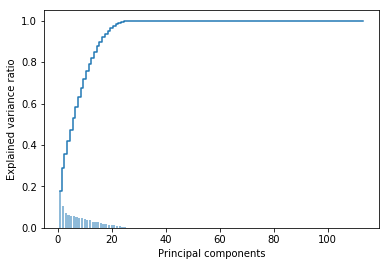

In [498]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [499]:
n_neighbors = 10
n_components = 2

Wall time: 49 ms


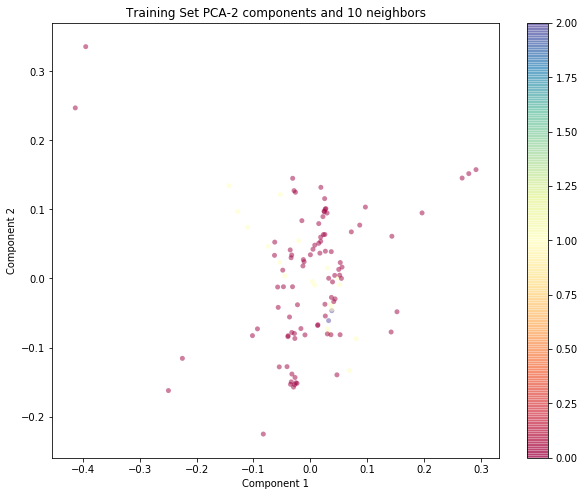

In [502]:
% time Y2 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,\
                                    eigen_solver='auto',\
                                    method='standard').fit_transform(X_train_std)
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title('Training Set PCA-2 components and 10 neighbors')
plt.scatter(Y2[:, 0], Y2[:, 1], c=y_train, cmap=plt.cm.Spectral,edgecolors='none',s=25,alpha=0.5);
cbar=plt.colorbar()# the range of hits landed is 0:2 scaled, and discrete as 0,1, or 2 per instance
#cbar.set_ticks(list(class_mapping.values()))
#cbar.set_ticklabels(list(class_mapping.keys()))

In [503]:
pca = PCA()
X_test_pca = pca.fit_transform(X_test_std)
pca.explained_variance_ratio_
print X_test_pca.shape

(49L, 49L)


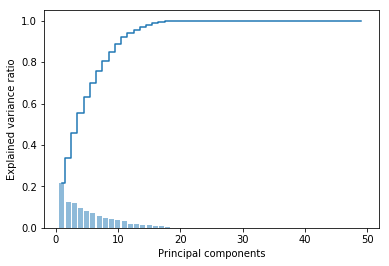

In [504]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [505]:
n_neighbors = 10
n_components = 2

Wall time: 17 ms


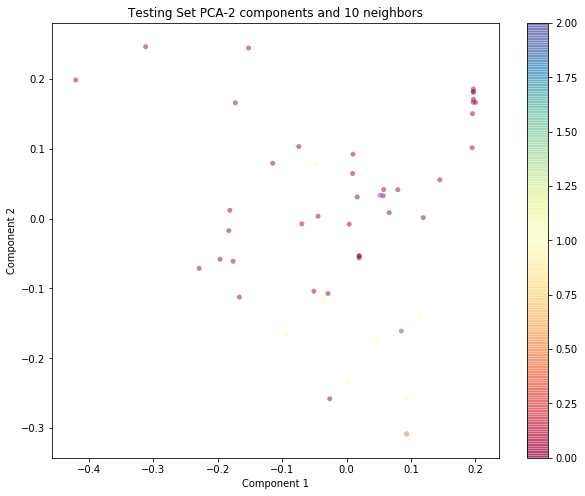

In [506]:
% time Y2 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,\
                                    eigen_solver='auto',\
                                    method='standard').fit_transform(X_test_std)
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title('Testing Set PCA-2 components and 10 neighbors')
plt.scatter(Y2[:, 0], Y2[:, 1], c=y_test, cmap=plt.cm.Spectral,edgecolors='none',s=25,alpha=0.5);
cbar=plt.colorbar()
#cbar.set_ticks(list(class_mapping.values()))
#cbar.set_ticklabels(list(class_mapping.keys()))

### K-means

In [507]:
from sklearn.cluster import KMeans
Y = KMeans(n_clusters=2).fit_transform(X_train_std)

In [508]:
print Y.shape
print Y

(113L, 2L)
[[ 3.35236598  4.69089362]
 [ 5.64106522  5.03719649]
 [ 4.52171904  6.87300974]
 [ 5.5060711   4.88924781]
 [ 6.48031342  8.14145609]
 [ 4.80918354  6.45940272]
 [ 2.84199741  6.77928045]
 [ 3.31153328  6.66567436]
 [ 6.69843758  2.59483987]
 [ 5.53710861  2.7259814 ]
 [ 3.83939995  6.58788395]
 [ 6.4309732   2.36655439]
 [ 4.75722447  3.21909738]
 [ 4.88950555  7.51489918]
 [12.50067598 13.6902671 ]
 [ 5.60743374  2.85348177]
 [ 2.15332186  5.03346889]
 [ 3.95646118  7.17605871]
 [ 6.88538259  8.50428457]
 [ 3.32706218  6.77833826]
 [ 3.46488634  3.88115054]
 [ 6.33334412  4.89631095]
 [ 4.51033456  6.18127048]
 [13.64096815 13.15218462]
 [ 8.05999382  6.7775174 ]
 [ 9.67091718 10.87658364]
 [ 3.78657955  7.30459084]
 [13.58686616 15.06287403]
 [12.9648785  13.07388346]
 [ 2.81512035  5.6888996 ]
 [ 3.37700496  4.49121864]
 [ 3.15174604  6.3771847 ]
 [ 3.68080242  2.32335934]
 [17.04714023 16.11513741]
 [ 6.2639941   8.44192331]
 [ 2.87764491  4.66521552]
 [ 2.18451215  4.

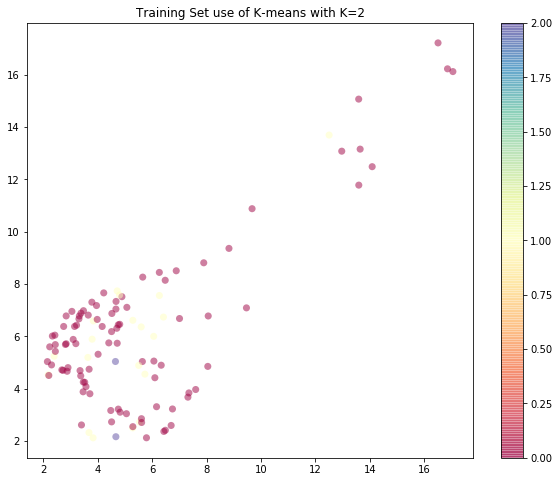

In [509]:
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.scatter(Y[:, 0], Y[:, 1], c=y_train, cmap=plt.cm.Spectral,edgecolors='none',s=50,alpha=0.5);
plt.title('Training Set use of K-means with K=2')
cbar=plt.colorbar()
#cbar.set_ticks(list(class_mapping.values()))
#cbar.set_ticklabels(list(class_mapping.keys()))

In [516]:
Y1 = KMeans(n_clusters=3).fit_transform(X_test_std)#because 0,1, or 2 hits per instance of hits landed

In [517]:
Y1.shape

(49L, 3L)

In [518]:
Y1

array([[13.99337691,  2.56209594,  5.36822351],
       [13.56889904,  3.95923249,  3.02969592],
       [13.48965747,  5.10659763,  2.72006934],
       [17.21157494, 11.82763121, 10.80415372],
       [13.7990741 ,  2.53580055,  3.85902438],
       [14.9247172 ,  4.25478834,  7.34774771],
       [14.97306962,  6.70687781,  7.00329684],
       [14.31950703,  3.08055996,  6.35769096],
       [14.03490934,  2.93001383,  4.95475547],
       [13.66862037,  5.74765544,  2.34077355],
       [13.83292509,  5.52146948,  3.94467246],
       [14.19400186,  4.48357795,  5.4068701 ],
       [13.67321624,  5.88825555,  2.42280084],
       [14.24021476,  2.96514781,  5.89258397],
       [13.64857594,  4.63911431,  2.42885453],
       [17.71018484, 12.23112407, 11.44551381],
       [13.50227494,  3.91438752,  3.36852406],
       [13.79109918,  3.09042923,  4.34473013],
       [13.65652945,  5.52237098,  2.32443552],
       [14.14134002,  4.68787917,  5.89987619],
       [14.38119392,  2.84288026,  6.117

In [519]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train_std)
#print kmeans.labels_

kmeans1 = KMeans(n_clusters=3, random_state=0).fit(X_test_std)
print kmeans1.labels_

actual = y_test
print actual


[1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1
 1 2 1 0 0 0 1 1 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 2 0 0 0
 0 2 0 0 0 0 0 1 0 0 1 0]


In [520]:
from pandas import Series, DataFrame

d = pd.Series(kmeans1.labels_)
a = pd.Series(actual)

df_k = pd.concat([d,a], axis=1)
df_k.columns = ['kMeansNunezTestingSet', 'NunezTrueHitsLanded']


#print d, a


In [521]:
ad = pd.Series(round(accuracy_score(kmeans1.labels_, y_test),2))
aa = pd.Series(round(accuracy_score(actual,y_test),2))

dfK = pd.concat([ad,aa],axis=1)#creates a vector of 1X5 for KNN results concatenating along columns
dfK.columns = ['kMeansNunezTestingSet', 'NunezTrueHitsLanded']
dfK.index = ['Kmeans all Testing sample results%']#gives the row name of this 1X5 data frame

df_km = pd.concat([df_k,dfK], axis=0)#concatenates along the rows for the results and scores
print df_km



                                    kMeansNunezTestingSet  NunezTrueHitsLanded
0                                                    1.00                  0.0
1                                                    0.00                  0.0
2                                                    0.00                  0.0
3                                                    0.00                  0.0
4                                                    1.00                  1.0
5                                                    1.00                  0.0
6                                                    0.00                  0.0
7                                                    1.00                  0.0
8                                                    1.00                  0.0
9                                                    0.00                  0.0
10                                                   0.00                  1.0
11                                                  

In [522]:

NunezKmeans1 = df_km.loc[(df_km.NunezTrueHitsLanded >0), ['kMeansNunezTestingSet', 'NunezTrueHitsLanded']]
NunezKmeans = NunezKmeans1.iloc[0:10,]

s = float(sum(NunezKmeans.iloc[:,0] == NunezKmeans.iloc[:,1]))
l = float(len(NunezKmeans.iloc[:,0]))
accuracy = round(s/l,2)

sa = pd.Series(round(accuracy,2))
aa = pd.Series(round(accuracy_score(y_test,y_test),2))

dfKM = pd.concat([sa,aa],axis=1)#creates a vector of 1X2 for KNN results concatenating along columns
dfKM.columns = ['kMeansNunezTestingSet', 'NunezTrueHitsLanded']
dfKM.index = ['KMeans results%']#gives the row name of this 1X2 data frame

dfkm = pd.concat([NunezKmeans, dfKM], axis=0)#concatenates along the rows for the results and scores



print 'Kmeans table on Nunez testing set of only the hits landed and predicted:\n\n',dfkm

Kmeans table on Nunez testing set of only the hits landed and predicted:

                 kMeansNunezTestingSet  NunezTrueHitsLanded
4                                  1.0                  1.0
10                                 0.0                  1.0
13                                 1.0                  1.0
22                                 0.0                  1.0
27                                 1.0                  1.0
28                                 0.0                  1.0
33                                 0.0                  2.0
38                                 2.0                  2.0
44                                 1.0                  1.0
47                                 0.0                  1.0
KMeans results%                    0.5                  1.0


## K-means unsupervised classification on the prediction of hits landed

In [524]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train_std)
TestResults = kmeans.predict(X_test_std)
print len(TestResults)
print TestResults
#print kmeans.cluster_centers_
print len(y_test)
print y_test
print sum(y_test==TestResults)
print 'Accuracy: ' , round(float(sum(y_test==TestResults))/(float(len(y_test))),2)

49
[0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0
 0 1 0 1 1 1 0 0 1 1 1 1]
49
[0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 2 0 0 0
 0 2 0 0 0 0 0 1 0 0 1 0]
21
Accuracy:  0.43


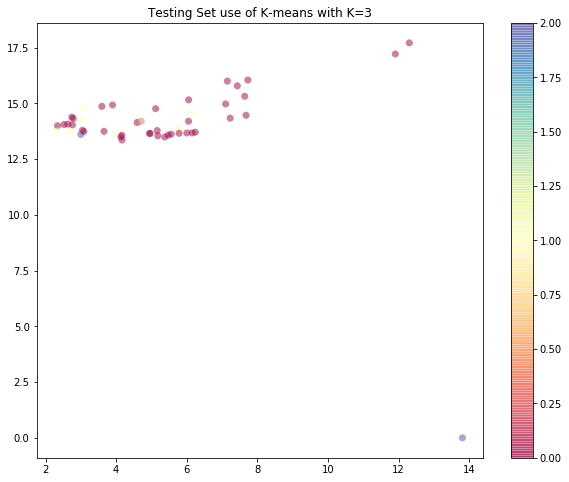

In [534]:
Y1 = KMeans(n_clusters=3).fit_transform(X_test_std)
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.scatter(Y1[:, 1], Y1[:, 2], c=y_test, cmap=plt.cm.Spectral,edgecolors='none',s=50,alpha=0.5);
plt.title('Testing Set use of K-means with K=3')
cbar=plt.colorbar()
#cbar.set_ticks(list(class_mapping.values()))
#cbar.set_ticklabels(list(class_mapping.keys()))

### Random Forests

In [535]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

n_estimators_list = [5,10,50,100,200,300,400,1000]

rfc = RandomForestClassifier(random_state=47)
grid = GridSearchCV(estimator=rfc, param_grid=dict(n_estimators=n_estimators_list))
grid.fit(X_train_std, y_train)

print grid
# summarize the results of the grid search
print 'Grid Training Set Best Score: ',grid.best_score_
print 'Grid Training Set Best Number of Trees Estimator: ', grid.best_estimator_.n_estimators

C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:651: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=47, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 300, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
Grid Training Set Best Score:  0.8141592920353983
Grid Training Set Best Number of Trees Estimator:  100


In [538]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train_scaled, y_train) #train Nunez's instances with random forest
predicted = rfc.predict(X_train_scaled)#test Nunez's instances with random forest
print predicted.shape
predicted

(113L,)


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [539]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

n_estimators_list = [5,10,50,100,200,300,400,1000]

rfc = RandomForestClassifier(random_state=47)
grid = GridSearchCV(estimator=rfc, param_grid=dict(n_estimators=n_estimators_list))
grid.fit(X_test_std, y_test)#Nunez testing set

print grid
# summarize the results of the grid search
print 'Grid Testing Set Best Score: ',grid.best_score_
print 'Grid Testing Set Best Number of Trees Estimator: ', grid.best_estimator_.n_estimators

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=47, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 300, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
Grid Testing Set Best Score:  0.7959183673469388
Grid Testing Set Best Number of Trees Estimator:  5


C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [540]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train_scaled, y_train)#train on Nunez's training instances 
predicted = rfc.predict(X_test_scaled) #then compare predictions of Mazvidal's testing instances
print predicted.shape
predicted

(49L,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [542]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_test_std, y_test)#train on Nunez's testing instances 
predicted = rfc.predict(X_test_scaled) #then compare predictions of Mazvidal's instances
print predicted.shape
predicted

(49L,)


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)